In [ ]:
%load_ext bigquery_magics
from google.cloud import bigquery
from google.cloud.bigquery.magics import magics

magics.context.project = ...

# "Will it snow tomorrow?" - The time traveler asked
The following dataset contains climate information from over 9000 stations accross the world. The overall goal of these subtasks will be to predict whether it will snow tomorrow 20 years ago. So if today is 1 April 2025 then the weather we want to forecast is for the 2 April 2005. You are supposed to solve the tasks using Big Query, which can be used in the Jupyter Notebook like it is shown in the following cell. For further information and how to use BigQuery in Jupyter Notebook refer to the Google Docs. 

The goal of this test is to test your coding knowledge in Python, BigQuery and Pandas as well as your understanding of Data Science. If you get stuck in the first part, you can use the replacement data provided in the second part.

In [2]:
%%bigquery

SELECT
*,
FROM `bigquery-public-data.samples.gsod`
LIMIT 20 


Query is running:   0%|          |

Downloading:   0%|          |

,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,...,min_temperature,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado
0,38940,99999,1929,12,2,52.500000,4,49.500000,4,999.700012,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
1,37770,99999,1929,11,26,47.799999,4,43.700001,4,NaN,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
2,37950,99999,1929,10,30,46.000000,4,42.799999,4,1006.299988,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
3,37770,99999,1929,11,19,47.500000,4,44.500000,4,1006.900024,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
4,30750,99999,1929,10,28,44.000000,4,41.000000,4,995.799988,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
5,33790,99999,1929,8,27,64.300003,4,56.000000,4,1013.599976,...,NaN,<NA>,0.0,NaN,True,True,True,True,True,True
6,31590,99999,1929,11,18,37.799999,4,32.000000,4,1015.799988,...,NaN,<NA>,0.0,NaN,False,False,False,False,False,False
7,38940,99999,1929,10,23,53.700001,4,47.799999,4,1010.000000,...,NaN,<NA>,0.0,NaN,False,False,False,False,False,False
8,37950,99999,1929,10,19,44.000000,4,39.000000,4,1006.799988,...,NaN,<NA>,0.0,NaN,True,True,True,True,True,True
9,38560,99999,1929,11,11,52.500000,4,46.500000,4,1009.299988,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False


In [3]:
%%bigquery
SELECT
  column_name,
  data_type
FROM
  `bigquery-public-data.samples.INFORMATION_SCHEMA.COLUMNS`
WHERE
  table_name = 'gsod'

Query is running:   0%|          |

Downloading:   0%|          |

,column_name,data_type
0,station_number,INT64
1,wban_number,INT64
2,year,INT64
3,month,INT64
4,day,INT64
5,mean_temp,FLOAT64
6,num_mean_temp_samples,INT64
7,mean_dew_point,FLOAT64
8,num_mean_dew_point_samples,INT64
9,mean_sealevel_pressure,FLOAT64


## Part 1

### 1. Task
Change the date format to 'YYYY-MM-DD' and select the data from 2000 till 2005 for station numbers including and between 725300 and 726300 , and save it as a pandas dataframe. Note the maximum year available is 2010. 

In [4]:
%%bigquery pandas_df
SELECT 
    *, DATE(year, month, day) AS date
FROM `bigquery-public-data.samples.gsod`
WHERE DATE(year, month, day) BETWEEN '2000-01-01' AND '2005-12-31'
    AND station_number BETWEEN 725300 and 726300


Query is running:   0%|          |

Downloading:   0%|          |

### 2. Task 
From here you want to work with the data from all stations 725300 to 725330 that have information from 2000 till 2005. 

In [5]:
%%bigquery 
WITH filtered AS (
  SELECT *
  FROM `bigquery-public-data.samples.gsod`
  WHERE
    station_number BETWEEN 725300 AND 725330
    AND year BETWEEN 2000 AND 2005
),
station_with_complete_years AS (
  SELECT
    station_number
  FROM
    filtered
  GROUP BY
    station_number
  HAVING
    COUNT(DISTINCT year) = 6
)

SELECT f.*
FROM filtered f
JOIN station_with_complete_years s
ON f.station_number = s.station_number


Query is running:   0%|          |

Downloading:   0%|          |

,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,...,min_temperature,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado
0,725316,99999,2000,5,5,71.099998,20,60.500000,20,NaN,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
1,725316,99999,2000,6,17,65.199997,22,60.099998,22,NaN,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
2,725316,99999,2000,10,20,59.200001,22,47.900002,22,NaN,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
3,725316,99999,2000,9,12,71.400002,22,63.400002,22,NaN,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
4,725316,99999,2000,1,20,17.500000,22,13.200000,22,NaN,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21848,725300,94846,2005,3,21,32.700001,24,25.500000,24,1023.200012,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
21849,725315,99999,2005,8,8,76.400002,24,68.500000,24,1017.700012,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
21850,725330,14827,2005,4,21,50.500000,24,44.799999,24,1016.900024,...,NaN,<NA>,0.52,NaN,True,True,True,True,True,True
21851,725330,14827,2005,12,1,27.400000,24,23.299999,24,1017.200012,...,NaN,<NA>,0.00,1.2,True,True,True,True,True,True


Start by checking which year received the most snowfall in our data. 

In [6]:
%%bigquery

WITH filtered AS (
  SELECT station_number, year
  FROM `bigquery-public-data.samples.gsod`
  WHERE station_number BETWEEN 725300 AND 725330
    AND year BETWEEN 2000 AND 2005
  GROUP BY station_number, year
),
station_with_complete_years AS (
  SELECT station_number
  FROM filtered
  GROUP BY station_number
  HAVING COUNT(DISTINCT year) = 6
)

SELECT b.year, SUM(IFNULL(b.snow_depth, 0)) AS total_snow_depth
FROM `bigquery-public-data.samples.gsod` b
JOIN station_with_complete_years s ON s.station_number = b.station_number
WHERE b.year BETWEEN 2000 AND 2005
GROUP BY 1
ORDER BY total_snow_depth desc
LIMIT 1

Query is running:   0%|          |

Downloading:   0%|          |

,year,total_snow_depth
0,2000,1084.500006


Add an additional field that indicates the daily change in snow depth measured at every station. And identify the station and day for which the snow depth increased the most.  

In [65]:
%%bigquery 

WITH filtered AS (
  SELECT station_number, year
  FROM `bigquery-public-data.samples.gsod`
  WHERE station_number BETWEEN 725300 AND 725330
    AND year BETWEEN 2000 AND 2005
  GROUP BY station_number, year
),
station_with_complete_years AS (
  SELECT station_number
  FROM filtered
  GROUP BY station_number
  HAVING COUNT(DISTINCT year) = 6
),
F AS (
    SELECT b.*, DATE(year, month, day) AS date
    FROM `bigquery-public-data.samples.gsod` b
    join station_with_complete_years s on s.station_number = b.station_number
    WHERE b.year BETWEEN 2000 AND 2005
)

SELECT 
  F1.*,
  #IFNULL(F2.snow_depth,0) AS prev_snow_depth,
  #(IFNULL(F1.snow_depth,0) - IFNULL(F2.snow_depth,0)) AS snow_depth_change
  F2.snow_depth AS prev_snow_depth,
  (F1.snow_depth - F2.snow_depth) AS snow_depth_change
FROM F F1
LEFT JOIN F F2 
  ON F1.station_number = F2.station_number 
  AND F1.date = DATE_ADD(F2.date, INTERVAL 1 DAY)
ORDER BY snow_depth_change DESC

Query is running:   0%|          |

Downloading:   0%|          |

,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,...,snow_depth,fog,rain,snow,hail,thunder,tornado,date,prev_snow_depth,snow_depth_change
0,725300,94846,2005,1,22,18.700001,24,14.600000,24,1013.200012,...,11.8,True,True,True,True,True,True,2005-01-22,2.0,9.8
1,725300,94846,2000,12,11,25.400000,24,22.400000,24,1016.799988,...,9.1,True,True,True,True,True,True,2000-12-11,1.2,7.9
2,725300,94846,2002,1,31,31.400000,24,30.400000,24,1018.200012,...,9.1,True,True,True,True,True,True,2002-01-31,1.2,7.9
3,725300,94846,2000,2,19,29.299999,24,23.900000,24,1023.000000,...,9.1,True,True,True,True,True,True,2000-02-19,3.1,6.0
4,725330,14827,2005,12,9,17.400000,24,13.600000,24,1024.699951,...,7.9,True,True,True,True,True,True,2005-12-09,2.0,5.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21848,725317,99999,2005,7,31,75.300003,24,63.900002,24,1021.700012,...,NaN,False,False,False,False,False,False,2005-07-31,NaN,NaN
21849,725305,99999,2005,11,22,34.700001,24,22.500000,24,1013.299988,...,NaN,False,False,False,False,False,False,2005-11-22,NaN,NaN
21850,725317,99999,2005,9,8,77.900002,24,61.900002,24,1018.599976,...,NaN,False,False,False,False,False,False,2005-09-08,NaN,NaN
21851,725300,94846,2005,10,23,40.700001,24,35.700001,24,1012.200012,...,NaN,True,True,True,True,True,True,2005-10-23,NaN,NaN


Do further checks on the remaining dataset, clean or drop data depending on how you see appropriate. 

In [ ]:
#df.to_csv('my_snow_data.csv',index=False)
df = pd.read_csv('my_snow_data.csv')

#### Data Preprocessing:

There are 21853 records with 34 fetures. It includes 10 stations.

1. **Feature Engineering:** 
    - Convert all bool columns to number
    - Convert date column to datetime
    - Create target variable: whethr tomorow will snow or not
    - Drop meaningless columns： num_*_samples: these indicate the number of observations. They are often constant and not very meaningful for modeling; *_explicit: these are boolean fields that indicate whether the value was directly measured by an instrument, not the actual weather measurement itself.
2. **Descriptive Analysis:**
    - Number of Snow Days per Month per Station
    - Correlation of Features with Target (Snow Tomorrow)
    - Sample Staions' Feature(snow_tomorrow, mean_temp, mean_visibility) Seasonality Trend 
    - Category Imbalance Analysis
3. **Check Missing Data:**
    - Drop columns with large missing values and meaningless
    - When creating training and test dataset for different models:
        - Handle snow_depth missing values
        - Handle missing dates for each station

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

**Feature Engineering**

In [11]:
# Feature Engineering
df = df.sort_values(['station_number', 'date']).reset_index(drop=True)
bool_cols = ['fog', 'rain', 'snow', 'hail', 'thunder', 'tornado']
df[bool_cols] = df[bool_cols].astype(int)
df['date'] = pd.to_datetime(df['date'])
df['target'] = df.groupby('station_number')['snow'].shift(-1)
df = df.drop(columns=[x for x in df.columns if x.startswith('num_') or x.endswith('_explicit')])
df.columns

Index(['station_number', 'wban_number', 'year', 'month', 'day', 'mean_temp',
       'mean_dew_point', 'mean_sealevel_pressure', 'mean_station_pressure',
       'mean_visibility', 'mean_wind_speed', 'max_sustained_wind_speed',
       'max_gust_wind_speed', 'max_temperature', 'min_temperature',
       'total_precipitation', 'snow_depth', 'fog', 'rain', 'snow', 'hail',
       'thunder', 'tornado', 'date', 'prev_snow_depth', 'snow_depth_change',
       'target'],
      dtype='object')

**Descriptive Statistics**

In [12]:
# Descriptive Statistics
df.describe()

,station_number,wban_number,year,month,day,mean_temp,mean_dew_point,mean_sealevel_pressure,mean_station_pressure,mean_visibility,...,fog,rain,snow,hail,thunder,tornado,date,prev_snow_depth,snow_depth_change,target
count,21853.0,21853.0,21853.0,21853.0,21853.0,21853.000000,21846.000000,19266.000000,1599.000000,21837.000000,...,21853.000000,21853.000000,21853.000000,21853.000000,21853.000000,21853.000000,21853,868.000000,725.000000,21843.000000
mean,725316.989246,82396.998261,2002.498376,6.525694,15.734682,51.810918,42.360739,1017.444996,990.428643,8.601662,...,0.180479,0.180479,0.180479,0.180479,0.180479,0.180479,2002-12-31 04:34:31.074909568,3.605876,-0.100414,0.180515
min,725300.0,14827.0,2000.0,1.0,1.0,-10.400000,-22.000000,992.700012,967.599976,0.300000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2000-01-01 00:00:00,1.200000,-4.400000,0.000000
25%,725314.0,94846.0,2001.0,4.0,8.0,36.299999,28.000000,1013.200012,986.599976,7.700000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2001-07-01 00:00:00,1.200000,-0.800000,0.000000
50%,725316.0,99999.0,2002.0,7.0,16.0,53.700001,43.299999,1017.200012,990.299988,9.400000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2002-12-31 00:00:00,3.100000,0.000000,0.000000
75%,725326.0,99999.0,2004.0,10.0,23.0,68.699997,58.200001,1021.500000,994.200012,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2004-06-30 00:00:00,5.100000,0.000000,0.000000
max,725330.0,99999.0,2005.0,12.0,31.0,100.400002,78.099998,1044.199951,1017.099976,15.700000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2005-12-31 00:00:00,18.100000,9.800000,1.000000
std,8.982111,33881.136616,1.707238,3.449054,8.80073,19.188218,18.750801,6.679617,6.353792,1.792564,...,0.384594,0.384594,0.384594,0.384594,0.384594,0.384594,NaN,2.843041,1.267458,0.384625


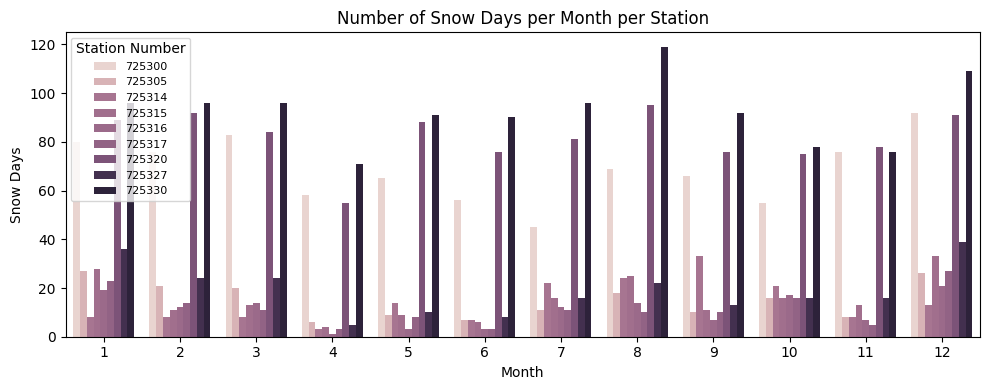

In [13]:
# Visualize the number of snow days per month for each station
snow_freq = df[df['snow']==1].groupby(['station_number', 'month']).size().reset_index(name='snow_freq')

plt.figure(figsize=(10, 4))
sns.barplot(data=snow_freq, x='month', y='snow_freq', hue='station_number', legend="full")

plt.title("Number of Snow Days per Month per Station")
plt.xlabel("Month")
plt.ylabel("Snow Days")
plt.legend(title="Station Number", fontsize = 8, loc="upper left")
plt.tight_layout()
plt.show()

We can see :
- For station 725300, 725320, 725330, they have snows throughout the year; 
- For most other stations like 725314, 725305, snow is highly concentrated in winter months (Jan, Feb, Dec)
- For stations 725326, there is no snow day

So there is variation across stations in same months, even in snowy months, some stations have significantly fewer snow days, pointing to local microclimate differences

target                      1.000000
rain                        0.444883
tornado                     0.444883
thunder                     0.444883
hail                        0.444883
snow                        0.444883
fog                         0.444883
prev_snow_depth             0.106656
snow_depth                  0.072624
total_precipitation         0.053217
station_number              0.034289
mean_dew_point              0.023027
mean_sealevel_pressure     -0.019975
mean_temp                  -0.026157
max_temperature            -0.028868
snow_depth_change          -0.030203
date                       -0.051492
max_sustained_wind_speed   -0.054131
mean_wind_speed            -0.069425
mean_visibility            -0.219750
Name: target, dtype: float64


/var/folders/hs/5y6_hx2d04sgkgfqz21z92zr0000gn/T/ipykernel_31347/3787916222.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_.values, y=corr_.index, palette='coolwarm')


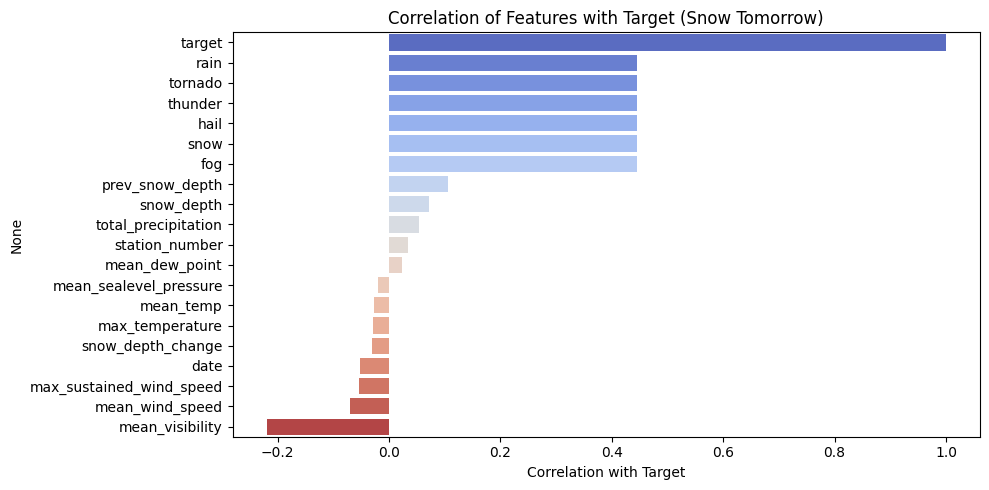

In [14]:
# Heatmap analysis
cols = [
    'station_number', 'mean_temp', 'mean_dew_point', 'mean_sealevel_pressure', 'mean_visibility',
    'mean_wind_speed', 'max_sustained_wind_speed', 'max_temperature', 'total_precipitation',
    'snow_depth', 'fog', 'rain', 'snow', 'hail', 'thunder', 'tornado', 'snow_depth_change', 'prev_snow_depth',
    'date', 'target'
]

corr_ = df[cols].corr()['target'].sort_values(ascending=False)

print(corr_)

plt.figure(figsize=(10, 5))
sns.barplot(x=corr_.values, y=corr_.index, palette='coolwarm')
plt.title("Correlation of Features with Target (Snow Tomorrow)")
plt.xlabel("Correlation with Target")
plt.tight_layout()
plt.show()



From the correlation analysis, we can see:

- Today’s snow is a strong predictor of tomorrow's snow with corr of 0.44
- mean_visibility(-0.21) has a rather strong negative relation with target: Lower visibility may signal snow
- snow_depth(0.07) and temp_trend_3d(0.06) has weak positive relationship with target
- date ranks among the top predictors, just after snow, and temperature-related variables, indicating that time of year alone is predictive, we can explore more temproal features

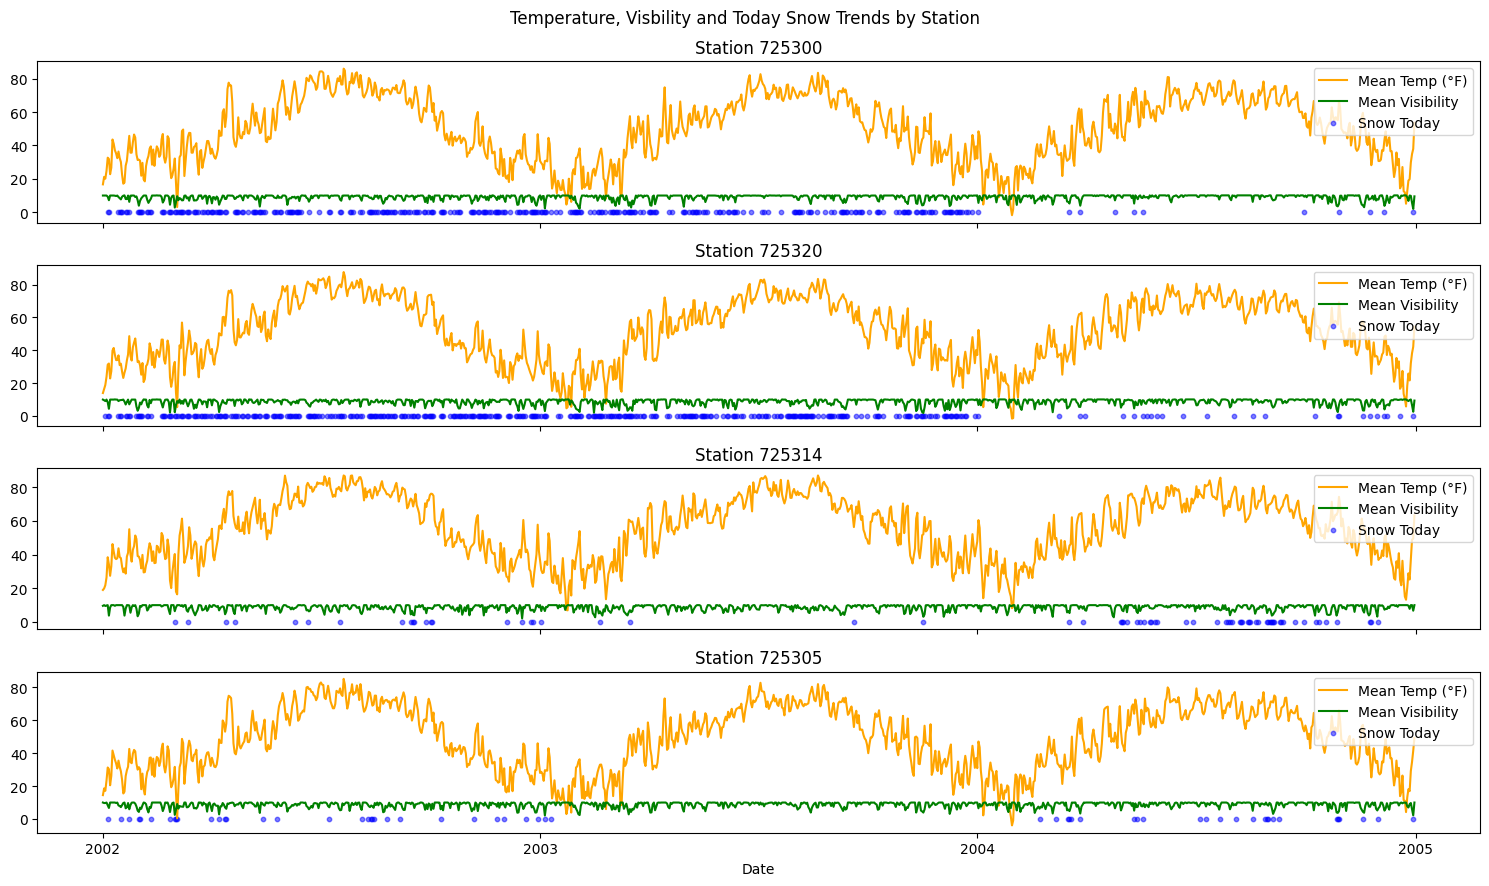

In [15]:
# Plot snow, temperature, visibility trend for sample stations
station_sample = [725300, 725320, 725314, 725305 ]
df_trend = df[(df['station_number'].isin(station_sample)) & (df['year'].isin([2002, 2003,2004]))]

fig, axs = plt.subplots(len(station_sample), 1, figsize=(15, 9), sharex=True)

for i, station in enumerate(station_sample):
    station_data = df_trend[df_trend['station_number'] == station]
    snow_days = station_data[station_data['snow'] == 1]  # Safer for boolean

    axs[i].plot(station_data['date'], station_data['mean_temp'], label='Mean Temp (°F)', color='orange')
    axs[i].plot(station_data['date'], station_data['mean_visibility'], label='Mean Visibility', color='green')
    axs[i].scatter(snow_days['date'], [0] * len(snow_days), label='Snow Today', color='blue', alpha=0.5, s=10)

    axs[i].set_title(f"Station {station}")
    axs[i].legend(loc='upper right')
    axs[i].xaxis.set_major_locator(mdates.YearLocator())
    axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.suptitle("Temperature, Visbility and Today Snow Trends by Station")
plt.xlabel("Date")
plt.tight_layout()
plt.show()

From the sample trend plot, we can see:

- Different Stations obviously have different snow patterns. The first two stations(725300, 725320) have more snowy days during 2002,2003, while station 725314, 725305 almost didn't have any snow in 2003. This could indicate microclimate differences. In 2004, winter seems mild in snow for all stations, especially 725300 and 725320, showing few snow days in 2004, even though temperatures were low.
- Mean Temperature shows clear seasonal cycles, and since mean_temp is a strong predictor in the above correlation analysis, we need to add seasonality feature
- When snow appears, visibility often drops below baseline (~10)

In [16]:
# Category Imbalance
df['snow'].value_counts(normalize=True)

snow
0    0.819521
1    0.180479
Name: proportion, dtype: float64

We can see **the dataset is imbalanced**, with only 18% of samples represent snow days, and 82% are no-snow days. This may cause **most models will be biased toward predicting “no snow”** by default to get high accuracy.
So **for the evaluation metric**, if we are predicting more dates, it should **include F1 score, recall, etc**. And we also need to **handle the imbalance in modeling**.

**Check Missing Values**

In [17]:
# Check Missing Valus
(df.isnull().sum() / len(df)) * 100

station_number                0.000000
wban_number                   0.000000
year                          0.000000
month                         0.000000
day                           0.000000
mean_temp                     0.000000
mean_dew_point                0.032032
mean_sealevel_pressure       11.838192
mean_station_pressure        92.682927
mean_visibility               0.073216
mean_wind_speed               0.032032
max_sustained_wind_speed      0.036608
max_gust_wind_speed          43.312131
max_temperature               0.004576
min_temperature             100.000000
total_precipitation           1.354505
snow_depth                   96.028005
fog                           0.000000
rain                          0.000000
snow                          0.000000
hail                          0.000000
thunder                       0.000000
tornado                       0.000000
date                          0.000000
prev_snow_depth              96.028005
snow_depth_change        

In [18]:
def drop_and_clean_columns(df):
    return df.drop(columns=[
        'min_temperature', 'mean_station_pressure', 'max_gust_wind_speed',
        'date_diff', 'wban_number', 'prev_snow_depth'  # all dropped later anyway
    ], errors='ignore')

def fill_missing_values(df):
    # Since mean_sealevel_pressure has 12% missing values, we don't want to directly drop them, then we can fill them with the mean of each month for each station. 
    # Same for the other missing data
    group_features = [
        'mean_dew_point', 'mean_wind_speed', 'max_sustained_wind_speed',
        'max_temperature', 'total_precipitation', 'mean_visibility', 'mean_sealevel_pressure'
    ]
    for f in group_features:
        df[f] = df.groupby(['station_number', 'month'])[f].transform(lambda x: x.fillna(x.mean()))

    # Since only Station 725326 doesnt have any mean_sealevel_pressure data, we can borrow the average value from the same month of other stations
    df['mean_sealevel_pressure'] = df.groupby('month')['mean_sealevel_pressure'].transform(lambda x: x.fillna(x.mean()))
    return df

df_test = df.copy()
df_test = drop_and_clean_columns(df_test)
df_test = fill_missing_values(df_test)

In [19]:
print((df_test.isnull().sum() / len(df_test)) * 100)
print()
print(df_test[df_test['mean_sealevel_pressure'].isnull()].station_number.unique())

station_number               0.000000
year                         0.000000
month                        0.000000
day                          0.000000
mean_temp                    0.000000
mean_dew_point               0.000000
mean_sealevel_pressure       0.000000
mean_visibility              0.000000
mean_wind_speed              0.000000
max_sustained_wind_speed     0.000000
max_temperature              0.000000
total_precipitation          0.000000
snow_depth                  96.028005
fog                          0.000000
rain                         0.000000
snow                         0.000000
hail                         0.000000
thunder                      0.000000
tornado                      0.000000
date                         0.000000
snow_depth_change           96.682378
target                       0.045760
dtype: float64

<IntegerArray>
[]
Length: 0, dtype: Int64


We found out **min_temperature(100% missing), snow_depth(96.02% missing), mean_station_pressure(92.68% missing)** have significant missing values:
 - Should **drop** min_temperature, mean_station_pressure, max_gust_wind_speed(for simplicity), and **imputate** other low missing values with **monthly average in each station**. And special case **for station 725326**, we imputed its missing values by borrowing the monthly average snow days from all other stations.

In [20]:
# Missing Dates Analysis
# Except RNN which needs continuous dates, other selected models(LR, RF, XGboost) only need the trend feature, so for their dataset, we can drop those missing dates.

# Check for missing dates in the dataset
df_test['date_diff'] = df_test.groupby('station_number')['date'].diff()
gaps = df_test[(df_test['date_diff'] != pd.Timedelta(days=1)) & (df_test['date_diff'].notna())]
if gaps.empty:
    print("There is no missing date in the dataset.")
else:
    print("Below are the missing dates for each station：")
    print(gaps[['station_number', 'date', 'date_diff']])

# Fill and Interpolate Time Series Data
def fill_and_interpolate_time_series(df):
    date_range = pd.date_range(start=df['date'].min(), end=df['date'].max(), freq='D')
    df_filled = []
    for station in df['station_number'].unique():
        s = df[df['station_number'] == station].set_index('date')
        s = s.reindex(date_range)
        s['station_number'] = station
        s['mean_temp'] = s['mean_temp'].interpolate(method='linear', limit_direction='both')
        df_filled.append(s)
    df = pd.concat(df_filled).reset_index().rename(columns={'index': 'date'})

    df['temp_trend_3d'] = df.groupby('station_number')['mean_temp'].transform(lambda x: x - x.rolling(window=3, min_periods=1).mean())
    return df

df_test = fill_and_interpolate_time_series(df_test)

Below are the missing dates for each station：
       station_number       date date_diff
2660           725305 2001-04-14    2 days
2724           725305 2001-06-18    2 days
3863           725305 2004-08-01    2 days
4804           725314 2001-02-28    2 days
6230           725314 2005-01-25    2 days
6249           725314 2005-02-16    4 days
6259           725314 2005-03-09   12 days
9328           725316 2001-08-03    2 days
9746           725316 2002-09-27    3 days
9854           725316 2003-01-14    2 days
10032          725316 2003-07-12    2 days
11270          725317 2000-12-01    2 days
11851          725317 2002-07-09    5 days
12039          725317 2003-01-14    2 days
12268          725317 2003-09-01    2 days
12313          725317 2003-10-17    2 days
12622          725317 2004-08-22    2 days
13099          725317 2005-12-13    2 days
15313          725326 2000-01-06    3 days
15596          725326 2000-10-16    2 days
15859          725326 2001-07-07    2 days
15863   

Regarding the dates discontinuity, Only 2-12 days missing per station. And 77 days missing in total.

Let's think about, in common sense, what is important for whether it will snow tmr:

1. Trend:  Accumulated cold over day; Pressure, precipitation, wind changes over time
2. Sudden Change: rapidly change in above factors

So **we need a continuous dates to identify the trend and calculate the change.** To not overcomplicate the problem and keep data as honest as possible, we only choose to **fill the tempreture with linear interpolation and keep everything else as NaN.** Then, we calcuate and keep the temp_trend feature.

In [21]:
# Missing Values Analysis on snow_depth
df_test_original = df_test[~df_test['snow'].isna()]
df_test_original.groupby('snow')['snow_depth'].agg(
    total='count',  
    missing=lambda x: x.isna().sum(),  
    total_rows='size'  
).assign(
    missing_pct=lambda d: (d['missing'] / d['total_rows']) * 100,
    not_missing_pct=lambda d: (d['total'] / d['total_rows']) * 100
)


,total,missing,total_rows,missing_pct,not_missing_pct
snow,,,,,
0.0,359,17550,17909,97.995421,2.004579
1.0,509,3435,3944,87.094320,12.905680


In [64]:
df_test_original[df_test_original['month']==7].groupby('snow')['snow_depth'].agg(
    total='count',  
    missing=lambda x: x.isna().sum(),  
    total_rows='size'  
).assign(
    missing_pct=lambda d: (d['missing'] / d['total_rows']) * 100,
    not_missing_pct=lambda d: (d['total'] / d['total_rows']) * 100
)

,total,missing,total_rows,missing_pct,not_missing_pct
snow,,,,,
0.0,0,1531,1531,100.0,0.0
1.0,0,310,310,100.0,0.0


**Snow_depth**: Since we would like to use snow_depth to calculate snow_depth_change, and the missing pattern itself contains information, we **cannot just dump this variable** although it has 96% missing data. Also, we also **cannot fill them with 0 as 0 has a real meaning here**:
- **When snow=1**: 87.09% snow_depth is missing: These may **represent unrecorded snow depths**; For the recorded values: median= 3.1, range= 1.2 to 18.1
- **When snow=0**: 97.99% snow_depth is NaN:  **Most of them are likely true zeros**, since the snow_depth column contains no zeros; For the recorded values: median= 3.5, range= 1.2 to 16.9
- There are still **non-null snow_depth when snow=0**, which means the **snow_depth measures accumulated snow** on the ground: we see snow_depth > 0 when snow=0: There's existing snow on the ground from previous days; when there's no snow on the ground and no new snow, they often don't record a depth
- We cannot impute all the NaN values as we are making up 96% of the data and it will destroy the information. Also, we don't have any snow_depth data in July, which is our target month. So, we decide to **keep snow_depth but add missing indicator**. 

In [ ]:
# Add temproal features and snow depth features according to above analysis
def add_features(df, fill=True):
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    df['year'] = df['date'].dt.year
    df['day_of_year'] = df['date'].dt.dayofyear

    # Add cyclical features for month and day of year to ensure model understands Jun-30 is very different from Dec-30
    df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
    df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
    df['day_sin'] = np.sin(2 * np.pi * df['day_of_year'] / 365)
    df['day_cos'] = np.cos(2 * np.pi * df['day_of_year'] / 365)

    # Snow depth features
    df['snow_depth_missing'] = df['snow_depth'].isna().astype(int)
    if fill == True:
        # Distinguish the filled columns with the original columns for different models
        df['snow_depth_fill'] = df.groupby('station_number')['snow_depth'].transform(lambda x: x.interpolate(method='linear', limit_direction='both')).fillna(0)
        df['snow_depth_change_fill'] = df['snow_depth_fill'].diff().fillna(0)
    
    return df

df_test = add_features(df_test)


In [24]:
df_test.isna().sum() / len(df_test) * 100

date                         0.000000
station_number               0.000000
year                         0.000000
month                        0.000000
day                          0.000000
mean_temp                    0.000000
mean_dew_point               0.305657
mean_sealevel_pressure       0.305657
mean_visibility              0.305657
mean_wind_speed              0.305657
max_sustained_wind_speed     0.305657
max_temperature              0.305657
total_precipitation          0.305657
snow_depth                  96.040146
fog                          0.305657
rain                         0.305657
snow                         0.305657
hail                         0.305657
thunder                      0.305657
tornado                      0.305657
snow_depth_change           96.692518
target                       0.351277
date_diff                    0.351277
temp_trend_3d                0.000000
day_of_year                  0.000000
month_sin                    0.000000
month_cos   

Now, except for the NaN values on dates that were imputated, all other columns have no missing values (except for pre-filled snow_depth, which was only for use with XGBoost)

### 3. Task
Now it is time to split the data, into a training, evaluation and test set. As a reminder, the date we are trying to predict snow fall for should constitute your test set.

In [25]:
import datetime as dt

target_date = str(dt.datetime.today()- dt.timedelta(days=20*365)).split(' ')[0]
target_date

'2005-07-02'

In [26]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21853 entries, 0 to 21852
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   station_number            21853 non-null  Int64         
 1   wban_number               21853 non-null  Int64         
 2   year                      21853 non-null  Int64         
 3   month                     21853 non-null  Int64         
 4   day                       21853 non-null  Int64         
 5   mean_temp                 21853 non-null  float64       
 6   mean_dew_point            21846 non-null  float64       
 7   mean_sealevel_pressure    19266 non-null  float64       
 8   mean_station_pressure     1599 non-null   float64       
 9   mean_visibility           21837 non-null  float64       
 10  mean_wind_speed           21846 non-null  float64       
 11  max_sustained_wind_speed  21845 non-null  float64       
 12  max_gust_wind_spee

In [27]:
train_df = df[(df['date'] >= '2000-01-01') & (df['date'] <= '2005-05-31')]
# Since we want to predict the snow on the target date, eg. 2005-07-02, we need to use the data in 2005-07-01 to predict it, 
# so the test set should be the data of the day before the target date.
val_df = df[(df['date'] >= '2005-06-01') & (df['date'] <= pd.to_datetime(target_date) - dt.timedelta(days=1))]
test_df = df[df['date'] == pd.to_datetime(target_date) - dt.timedelta(days=1)]

In [28]:
print(f"Train set: {train_df.shape}")
print(f"Validation set: {val_df.shape}")
print(f"Test set: {test_df.shape}")

Train set: (19714, 27)
Validation set: (310, 27)
Test set: (10, 27)


## Part 2
If you made it up to here all by yourself, you can use your prepared dataset to train an algorithm of your choice to forecast whether it will snow on the following date for each station in this dataset:

In [29]:
import datetime as dt

str(dt.datetime.today()- dt.timedelta(days=20*365)).split(' ')[0]

'2005-07-02'

You are allowed to use any library you are comfortable with such as sklearn, tensorflow, keras etc. 
If you did not manage to finish part one feel free to use the data provided in 'coding_challenge.csv' Note that this data does not represent a solution to Part 1. 

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score

**Model Slection**:

- Baseline: Logistic Regression. It needs to fill the nan values and make the numeric data normalized
- Random Forest: Also needs to fill the nan values, but dont need to scale the data
- XGboost: Dont need to fill the nan values, so we keep data as honest as possible

In [32]:
# Baseline model: Logistic Regression

def preprocess_for_logistic(df):

    df = drop_and_clean_columns(df)
    df = fill_missing_values(df)
    df = fill_and_interpolate_time_series(df)
    df = df[~df['snow'].isna()]     # we dnt need continuous date for LR, so we only keep the tem_trend feature and drop other filled dates
    df = add_features(df)
    df = df.drop(columns=['snow_depth', 'snow_depth_change' ,'date'])
    return df

train_df_lr = preprocess_for_logistic(train_df)
val_df_lr = preprocess_for_logistic(val_df)

X_train_lr = train_df_lr.drop(columns=['target'])
y_train_lr = train_df_lr['target']

X_val_lr = val_df_lr.drop(columns=['target'])
y_val_lr = val_df_lr['target']

# Scaling the numeric features
scaler = StandardScaler()
cols = ['mean_temp',
       'mean_dew_point', 'mean_sealevel_pressure', 'mean_visibility',
       'mean_wind_speed', 'max_sustained_wind_speed', 'max_temperature',
       'total_precipitation', 'temp_trend_3d','snow_depth_fill', 'snow_depth_change_fill' ]
X_train_lr[cols] = scaler.fit_transform(X_train_lr[cols])
X_val_lr[cols] = scaler.transform(X_val_lr[cols])

In [33]:
lr = LogisticRegression(class_weight='balanced', max_iter=10000, random_state=24)
lr.fit(X_train_lr, y_train_lr)

y_pred_lr = lr.predict(X_val_lr)
y_proba_lr = lr.predict_proba(X_val_lr)[:, 1]

print(confusion_matrix(y_val_lr, y_pred_lr))
print(classification_report(y_val_lr, y_pred_lr, digits=3))
print("ROC AUC Score:", roc_auc_score(y_val_lr, y_proba_lr))


[[257  18]
 [ 19  16]]
              precision    recall  f1-score   support

         0.0      0.931     0.935     0.933       275
         1.0      0.471     0.457     0.464        35

    accuracy                          0.881       310
   macro avg      0.701     0.696     0.698       310
weighted avg      0.879     0.881     0.880       310

ROC AUC Score: 0.6827012987012987


**This result shows:**

- Correctly predicted no-snow for 267 times(TN); Predicted snow when there was none for 18 times(FP); Missed snow cases for 19 times(FN);  Correctly predicted snow 16 times(TP)
- **Due to the category imblance**, we can see the accuracy is high(0.884), but when the model predicts snow=1, it's correct only around 47% of the time(Presicion), and it detects only 46% of actual snow days(Recall)
- ROC AUC Score of 0.682 means there's an 68% chance that LR will correctly rank a randomly chosen snowy day higher than a randomly chosen non-snowy day, indicating moderate ability to separate snow from no-snow cases, better than random

In [ ]:
# Random Forest Classifier
train_df_rf = preprocess_for_logistic(train_df)
val_df_rf = preprocess_for_logistic(val_df)

X_train_rf = train_df_rf.drop(columns=['target'])
y_train_rf = train_df_rf['target']

X_val_rf = val_df_rf.drop(columns=['target'])
y_val_rf = val_df_rf['target']

rf = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=24
)

rf.fit(X_train_rf, y_train_rf)

#y_pred_rf = rf.predict(X_val_rf)
y_proba_rf = rf.predict_proba(X_val_rf)[:, 1]
y_pred_rf = (y_proba_rf >= 0.3).astype(int)

print(confusion_matrix(y_val_rf, y_pred_rf))
print(classification_report(y_val_rf, y_pred_rf, digits=3))
print("ROC AUC Score:", roc_auc_score(y_val_rf, y_pred_rf))

[[274   1]
 [ 35   0]]
              precision    recall  f1-score   support

         0.0      0.887     0.996     0.938       275
         1.0      0.000     0.000     0.000        35

    accuracy                          0.884       310
   macro avg      0.443     0.498     0.469       310
weighted avg      0.787     0.884     0.832       310

ROC AUC Score: 0.49818181818181817


The plain result for random forest is not performing well, which may because of the imbalance dataset. So we can tune the parameters and modify the scoring method to ROC_AUC.

In [35]:
# Perform hyperparameter tuning for Random Forest Classifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score

#scoring = make_scorer(f1_score, pos_label=1)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced', 'balanced_subsample']
}

search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=30,
    scoring='roc_auc',
    cv=3,
    verbose=1,
    random_state=24,
    n_jobs=1
)

search.fit(X_train_rf, y_train_rf)
best_rf = search.best_estimator_

best_rf = search.best_estimator_
print("Best Parameters:", search.best_params_)
print("Best Score (using selected metric):", search.best_score_)



Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 5, 'class_weight': 'balanced_subsample'}
Best Score (using selected metric): 0.8340923366698251


In [ ]:
# Evaluation
y_proba_rf = best_rf.predict_proba(X_val_rf)[:, 1]

y_pred_rf = (y_pred_rf >= 0.3).astype(int)
print(confusion_matrix(y_val_rf, y_pred_rf))
print(classification_report(y_val_rf, y_pred_rf))
roc_auc = roc_auc_score(y_val_rf, y_pred_rf)
print(f"ROC AUC Score: {roc_auc:.3f}")

[[245  30]
 [ 15  20]]
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92       275
         1.0       0.40      0.57      0.47        35

    accuracy                           0.85       310
   macro avg       0.67      0.73      0.69       310
weighted avg       0.88      0.85      0.87       310

ROC AUC Score: 0.797


Compared to high precision, recall and f1-score for predicting snow=0, they are significantly lower (0.40, 0.57, and 0.47 respectively) when predicting snow=1, indicating class imbalance still affects minority prediction, although better than earlier attempts. But a 0.80 ROC AUC score indicates that the model separates the two classes reasonably well. 

The **predicted threshold was set to 0.3**, where the recall and F1-score for the minority class (snow = 1) reached their highest values on the validation set. This indicates that **using a lower threshold helps the model identify more positive (snow) cases**, cause in imbalanced classification tasks, the minority class is often underrepresented.

In [37]:
feature_importance = pd.Series(best_rf.feature_importances_, index=X_train_rf.columns)
print(feature_importance.sort_values(ascending=False).head(10))

snow_depth_fill    0.140772
tornado            0.129851
hail               0.129620
snow               0.122043
thunder            0.113324
rain               0.078687
fog                0.068984
station_number     0.061939
mean_visibility    0.044674
year               0.020207
dtype: float64


In [ ]:
# XGBoost
def preprocess_for_xgboost(df):
    df = drop_and_clean_columns(df)  
    df = fill_missing_values(df)
    df = add_features(df, fill=False)
    df = df.drop(columns=['date', 'year', 'month', 'day'])
    return df

train_df_xgb = preprocess_for_xgboost(train_df)
val_df_xgb = preprocess_for_xgboost(val_df)

X_train_xgb = train_df_xgb.drop(columns=['target'])
y_train_xgb = train_df_xgb['target']

X_val_xgb = val_df_xgb.drop(columns=['target'])
y_val_xgb = val_df_xgb['target']

scale_pos_weight = (y_train_xgb == 0).sum() / (y_train_xgb == 1).sum()
print("scale_pos_weight:", scale_pos_weight)

xgb = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    scale_pos_weight=scale_pos_weight,  
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=24
)

xgb.fit(X_train_xgb, y_train_xgb)

y_pred_xgb = xgb.predict(X_val_xgb)
y_proba_xgb = xgb.predict_proba(X_val_xgb)[:, 1]
#y_pred_xgb = (y_proba_xgb >= 0.5).astype(int)

print(confusion_matrix(y_val_xgb, y_pred_xgb))
print(classification_report(y_val_xgb, y_pred_xgb, digits=3))
print("ROC AUC Score:", roc_auc_score(y_val_xgb, y_proba_xgb))


scale_pos_weight: 4.66657085369359
[[244  31]
 [ 11  24]]
              precision    recall  f1-score   support

         0.0      0.957     0.887     0.921       275
         1.0      0.436     0.686     0.533        35

    accuracy                          0.865       310
   macro avg      0.697     0.786     0.727       310
weighted avg      0.898     0.865     0.877       310

ROC AUC Score: 0.8894545454545454


/Users/hangyang/anaconda3/envs/snowenv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [02:55:58] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_abwcuua5oq/croot/xgboost-split_1749630928197/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


To address the imbalance issue, we **calculate 'scale_pos_weight'**, which is a built-in XGBoost mechanism for reweighting the minority class.

From the result, we can tell this model performs the best for now:

- Correctly predicted no-snow for 244 times(TN); Predicted snow when there was none for 31 times(FP); Missed snow cases for 11 times(FN);  Correctly predicted snow 24 times(TP)
- For minority class 1: Precision is moderate (0.436), but **recall is strong (0.686)**. This means the model successfully identifies a good portion of the minority class (true positives)
- **ROC AUC = 0.889 indicates excellent discrimination ability**, showing the model separates classes well overall

In [ ]:
from scipy.stats import uniform, randint

param_dist = {
    "n_estimators": randint(100, 500),
    "max_depth": randint(3, 10),
    "learning_rate": uniform(0.01, 0.2),
    "subsample": uniform(0.6, 0.4),
    "colsample_bytree": uniform(0.6, 0.4),
    "gamma": uniform(0, 5)
}

search_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=30,
    scoring='roc_auc',
    cv=3,
    verbose=1,
    n_jobs=1,
    random_state=24
)

search_xgb.fit(X_train_xgb, y_train_xgb)
best_xgb = search_xgb.best_estimator_


In [42]:
y_pred_xgb = best_xgb.predict(X_val_xgb)
y_proba_xgb = best_xgb.predict_proba(X_val_xgb)[:, 1]

print(confusion_matrix(y_val_xgb, y_pred_xgb))
print(classification_report(y_val_xgb, y_pred_xgb, digits=3))
print("ROC AUC Score:", roc_auc_score(y_val_xgb, y_proba_xgb))

[[253  22]
 [ 18  17]]
              precision    recall  f1-score   support

         0.0      0.934     0.920     0.927       275
         1.0      0.436     0.486     0.459        35

    accuracy                          0.871       310
   macro avg      0.685     0.703     0.693       310
weighted avg      0.877     0.871     0.874       310

ROC AUC Score: 0.8673246753246754


From the result, we can see:

- The original model had better recall and F1 for class 1, and higher ROC AUC. Thus, parameter tuning in this case did not improve the model, and actually made it worse for the class we care most about

**Target Date Prediction**

In [45]:
# For Logistic Regression and Random Forest
test_df_lr = preprocess_for_logistic(test_df)
X_test_lr = test_df_lr.drop(columns=['target'], errors='ignore')
X_test_rf = X_test_lr.copy()

# For XGBoost
test_df_xgb = preprocess_for_xgboost(test_df)
X_test_xgb = test_df_xgb.drop(columns=['target'], errors='ignore')

In [76]:
# Logistic Regression
X_test_lr[cols] = scaler.fit_transform(X_test_lr[cols])
y_pred_lr = lr.predict(X_test_lr)
y_proba_lr = lr.predict_proba(X_test_lr)[:, 1]

# Random Forest
y_proba_rf = best_rf.predict_proba(X_test_rf)[:, 1]
threshold = 0.3
y_test_pred_rf = (y_proba_rf >= threshold).astype(int)
#y_pred_rf = best_rf.predict(X_test_rf)

# XGBoost
y_pred_xgb = xgb.predict(X_test_xgb)
y_proba_xgb = xgb.predict_proba(X_test_xgb)[:, 1]

In [77]:
# Compare predictions with the true labels
station_info = df[df['date'] == target_date][['station_number', 'snow']].reset_index(drop=True)
results = pd.DataFrame({
    'lr_pred': y_pred_lr,
    'lr_proba': y_proba_lr,
    'rf_pred': y_test_pred_rf,
    'rf_proba': y_proba_rf,
    'xgb_pred': y_pred_xgb,
    'xgb_proba': y_proba_xgb
})
final_results = pd.concat([station_info, results], axis=1)
final_results = final_results.rename(columns={'snow': 'true_label'})

final_results

,station_number,true_label,lr_pred,lr_proba,rf_pred,rf_proba,xgb_pred,xgb_proba
0,725300,0,0.0,0.167101,0,0.291643,0,0.229246
1,725305,0,0.0,0.141488,0,0.199027,0,0.042580
2,725314,0,0.0,0.305997,0,0.223928,0,0.066548
3,725315,0,0.0,0.311924,0,0.261108,0,0.140267
4,725316,0,0.0,0.153705,0,0.203872,0,0.028698
5,725317,0,0.0,0.185433,0,0.211199,0,0.040570
6,725320,0,0.0,0.237947,0,0.224512,0,0.256385
7,725326,0,0.0,0.203092,0,0.208678,0,0.005906
8,725327,0,0.0,0.203772,0,0.222403,0,0.071835
9,725330,0,0.0,0.275228,1,0.371889,1,0.656923


In [75]:
#pd.set_option('display.max_columns', None)
df[(df['month'] == 7) & (df['day'] == 1) & (df['station_number'] == 725330)]


,station_number,wban_number,year,month,day,mean_temp,mean_dew_point,mean_sealevel_pressure,mean_station_pressure,mean_visibility,mean_wind_speed,max_sustained_wind_speed,max_gust_wind_speed,max_temperature,min_temperature,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado,date,prev_snow_depth,snow_depth_change,target
19843,725330,14827,2000,7,1,68.699997,56.500000,1018.000000,NaN,9.7,4.6,8.9,NaN,53.099998,NaN,0.00,NaN,0,0,0,0,0,0,2000-07-01,NaN,NaN,0.0
20208,725330,14827,2001,7,1,73.599998,63.400002,1015.000000,NaN,8.7,9.5,15.0,20.0,66.000000,NaN,0.04,NaN,1,1,1,1,1,1,2001-07-01,NaN,NaN,0.0
20573,725330,14827,2002,7,1,81.599998,71.800003,1019.900024,990.599976,7.5,7.3,12.0,NaN,71.099998,NaN,0.00,NaN,1,1,1,1,1,1,2002-07-01,NaN,NaN,1.0
20938,725330,14827,2003,7,1,72.599998,63.900002,1019.299988,990.000000,8.1,4.5,8.0,NaN,61.000000,NaN,0.00,NaN,1,1,1,1,1,1,2003-07-01,NaN,NaN,1.0
21304,725330,14827,2004,7,1,71.199997,57.299999,1019.000000,NaN,9.9,2.4,7.0,NaN,55.000000,NaN,0.00,NaN,0,0,0,0,0,0,2004-07-01,NaN,NaN,0.0
21669,725330,14827,2005,7,1,73.900002,62.299999,1009.000000,979.900024,9.9,9.3,15.9,21.0,66.000000,NaN,0.55,NaN,0,0,0,0,0,0,2005-07-01,NaN,NaN,0.0


- **Predicted Probabilities (*_proba)**: These show the confidence level for predicting snow (snow = 1). Values closer to 1 indicate higher confidence in snow presence
- For most stations, **all models correctly predicted 0 (no snow), with low probability scores**
- **XGBoost** and **Random Forest** predicted snow=1 for one station (725330), with a relatively high probability (0.6569, 0.3719 respectively), but the true label was actually 0. Both models learned that certain weather conditions indicate snow, and Station 725330 must have those conditions even though it didn't actually snow, or it likely represents "almost snow" conditions. This represents **a false positive**, which may also be a trade off when models are tuned to detect more rare positives (snow days)
- **Logistic Regression tends to be more conservative**, with consistently lower probability scores and no positive predictions in this sample.
- **Random Forest and XGBoost are generally more sensitive** due to better handling of imbalance, resulting in higher probabilities but potentially more false positives


### Final Limitation Analysis And Conclusion

**1. Overall Model Performance**

From the validation results, we conclude that:

**XGBoost performs the best overall**, achieving the highest ROC AUC score and strongest F1 score for the minority class (snow days). It benefits from scale_pos_weight to handle class imbalance effectively.

**Random Forest also performed competitively** when using a custom threshold (0.3), tuned to improve recall on the minority class.

**Logistic Regression**, while simple and interpretable, was more conservative in its predictions and showed lower recall for snow days.


**2. Impact of Class Imbalance**

One of the most significant challenges in this task is the **severe class imbalance** (many more no-snow days than snow days). This strongly affects models by biasing them toward predicting the majority class (no snow), leading to poor recall and F1 score for the minority class.

I applied several techniques to mitigate this:

- Class weights (class_weight='balanced' in RF)
- scale_pos_weight in XGBoost
- Threshold tuning (lowering from 0.5 to 0.3 to favor minority recall)
- Evaluation with suitable metrics (ROC AUC)

These helped, but further improvements are possible through additional methods such as:

- Oversampling (like, SMOTE)
- Undersampling

**3.Feature Availability Limitation**

Another key limitation is that **snow_depth**, which proved to be a strong predictor in correlation analysis, **is completely missing for July**, which is the target prediction month. This significantly weakens all models since they rely on snow_depth for accurate classification.

Future efforts should:

- Seek imputation strategies using historical patterns or nearby station data if there is geo data
- Or explore proxy features that can partially capture snow likelihood

**4. Temporal Dynamics & Model Choice**

Previous EDA showed clear **seasonality** in temperature and strong **time dependencies** in snow patterns. Therefore:
- Classical models (like RF, LR, XGB) may not fully capture temporal trends.
- RNN, LSTM-like models can model sequential dependencies, which are more suitable for time series forecasting. However, they require: 
    - Careful data reshaping to preserve time order
    - Complete, continuous sequences without missing temporal gaps


# END